In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize":(30,15)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
df = pd.read_csv('C:/Users/himanshu/ml project code/jupyter books/ml_assignment_code/music/data.csv')
df_copy = df.copy()

In [3]:
df_copy.shape

(1000, 30)

In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

In [5]:
df_copy.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,40.932634,-21.463776,24.816275,-18.945571,15.253459,-15.050104,12.262823,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,48.931193,8.699106,13.954752,5.359449,0.381334,-13.490265,16.871769,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,18.620984,30.922996,3.291330,22.587447,-20.418303,12.120995,-26.347956,-4.356270,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,60.986727,0.725807,12.437828,1.183836,-1.540779,-17.888154,8.358496,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,56.993472,2.271347,26.591402,-4.274803,17.338809,-7.985593,15.235427,-6.934599,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [6]:
df_copy.isnull().sum()

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [7]:
df_copy.duplicated().sum()

0

In [8]:
numerical_feature = [feature for feature in df_copy.columns if df_copy[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df_copy[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df_copy.columns if feature not in numerical_feature]

In [10]:
discrete_feature

[]

In [11]:
continuous_feature

['tempo',
 'beats',
 'chroma_stft',
 'rmse',
 'spectral_centroid',
 'spectral_bandwidth',
 'rolloff',
 'zero_crossing_rate',
 'mfcc1',
 'mfcc2',
 'mfcc3',
 'mfcc4',
 'mfcc5',
 'mfcc6',
 'mfcc7',
 'mfcc8',
 'mfcc9',
 'mfcc10',
 'mfcc11',
 'mfcc12',
 'mfcc13',
 'mfcc14',
 'mfcc15',
 'mfcc16',
 'mfcc17',
 'mfcc18',
 'mfcc19',
 'mfcc20']

In [12]:
categorical_feature

['filename', 'label']

In [14]:
for i in categorical_feature:
    print(i)
    print(df_copy[i].unique())
    print(len(df_copy[i].unique()))
    print('*'*20)

filename
['blues.00081.au' 'blues.00022.au' 'blues.00031.au' 'blues.00012.au'
 'blues.00056.au' 'blues.00058.au' 'blues.00066.au' 'blues.00060.au'
 'blues.00025.au' 'blues.00014.au' 'blues.00093.au' 'blues.00097.au'
 'blues.00040.au' 'blues.00096.au' 'blues.00095.au' 'blues.00068.au'
 'blues.00071.au' 'blues.00080.au' 'blues.00094.au' 'blues.00029.au'
 'blues.00067.au' 'blues.00033.au' 'blues.00001.au' 'blues.00098.au'
 'blues.00087.au' 'blues.00083.au' 'blues.00055.au' 'blues.00077.au'
 'blues.00076.au' 'blues.00049.au' 'blues.00011.au' 'blues.00048.au'
 'blues.00053.au' 'blues.00064.au' 'blues.00051.au' 'blues.00013.au'
 'blues.00045.au' 'blues.00075.au' 'blues.00082.au' 'blues.00091.au'
 'blues.00035.au' 'blues.00057.au' 'blues.00016.au' 'blues.00037.au'
 'blues.00050.au' 'blues.00046.au' 'blues.00002.au' 'blues.00038.au'
 'blues.00006.au' 'blues.00003.au' 'blues.00043.au' 'blues.00092.au'
 'blues.00034.au' 'blues.00005.au' 'blues.00069.au' 'blues.00023.au'
 'blues.00086.au' 'blues.

In [15]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder to the categorical column and transform the values
encoded_labels_filename = label_encoder.fit_transform(df_copy['filename'])
encoded_labels_label = label_encoder.fit_transform(df_copy['label'])


# Replace the original column with the encoded labels
df_copy['filename'] = encoded_labels_filename
df_copy['label'] = encoded_labels_label

In [16]:
for i in categorical_feature:
    print(i)
    print(df_copy[i].unique())
    print(len(df_copy[i].unique()))
    print('*'*20)

filename
[ 81  22  31  12  56  58  66  60  25  14  93  97  40  96  95  68  71  80
  94  29  67  33   1  98  87  83  55  77  76  49  11  48  53  64  51  13
  45  75  82  91  35  57  16  37  50  46   2  38   6   3  43  92  34   5
  69  23  86   8  72   7  78  84  32  44  36  39  52  41  42  21  85  74
  28  24  47  17  15  70  99   0  89  79  30  73  90  88  61  65  19   9
  18  26  20  27  10  59   4  63  54  62 191 137 171 156 147 178 119 117
 106 198 197 179 181 196 128 125 135 141 136 143 189 124 144 100 183 162
 146 155 194 199 139 131 176 123 173 140 154 169 186 158 182 104 190 166
 165 133 116 192 110 167 102 115 170 145 150 164 152 118 195 112 132 188
 126 129 130 121 185 153 111 160 103 107 149 157 148 163 180 138 105 142
 168 175 151 113 101 114 174 193 109 134 122 187 177 159 127 120 172 161
 108 184 213 282 206 233 210 200 269 216 204 268 235 266 223 243 209 283
 244 299 298 245 222 207 231 239 275 215 250 271 205 220 259 227 272 241
 286 267 228 294 247 255 254 240 248 232 2

In [17]:
X = df_copy.drop('label',axis=1)
y = df_copy['label']

In [18]:
X

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,81,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,40.932634,-21.463776,24.816275,-18.945571,15.253459,-15.050104,12.262823,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987
1,22,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,48.931193,8.699106,13.954752,5.359449,0.381334,-13.490265,16.871769,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485
2,31,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,18.620984,30.922996,3.291330,22.587447,-20.418303,12.120995,-26.347956,-4.356270,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260
3,12,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,60.986727,0.725807,12.437828,1.183836,-1.540779,-17.888154,8.358496,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607
4,56,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,56.993472,2.271347,26.591402,-4.274803,17.338809,-7.985593,15.235427,-6.934599,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,917,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,105.403012,-43.945538,54.100395,-18.411090,23.520838,-17.607988,20.660727,-18.454381,17.475770,-15.174259,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201
996,981,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,89.522283,-33.497073,41.974745,-25.936361,23.026082,-20.271538,14.354429,-16.350707,17.039462,-16.957086,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224
997,904,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,134.443879,1.027332,54.440979,-0.464906,35.829542,-10.860896,16.383278,-10.030961,6.602061,-6.700004,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677
998,906,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,136.611573,-46.700574,46.457300,-17.135585,10.505286,-14.554871,16.543108,-12.317913,3.689543,-12.647550,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148


In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    9
996    9
997    9
998    9
999    9
Name: label, Length: 1000, dtype: int32

In [120]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=40)

In [21]:
X_train.shape

(670, 29)

In [22]:
X_test.shape

(330, 29)

In [23]:
y_train.shape

(670,)

In [24]:
y_test.shape

(330,)

In [41]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [42]:
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler(with_mean=False))
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,X.columns)
])

In [43]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

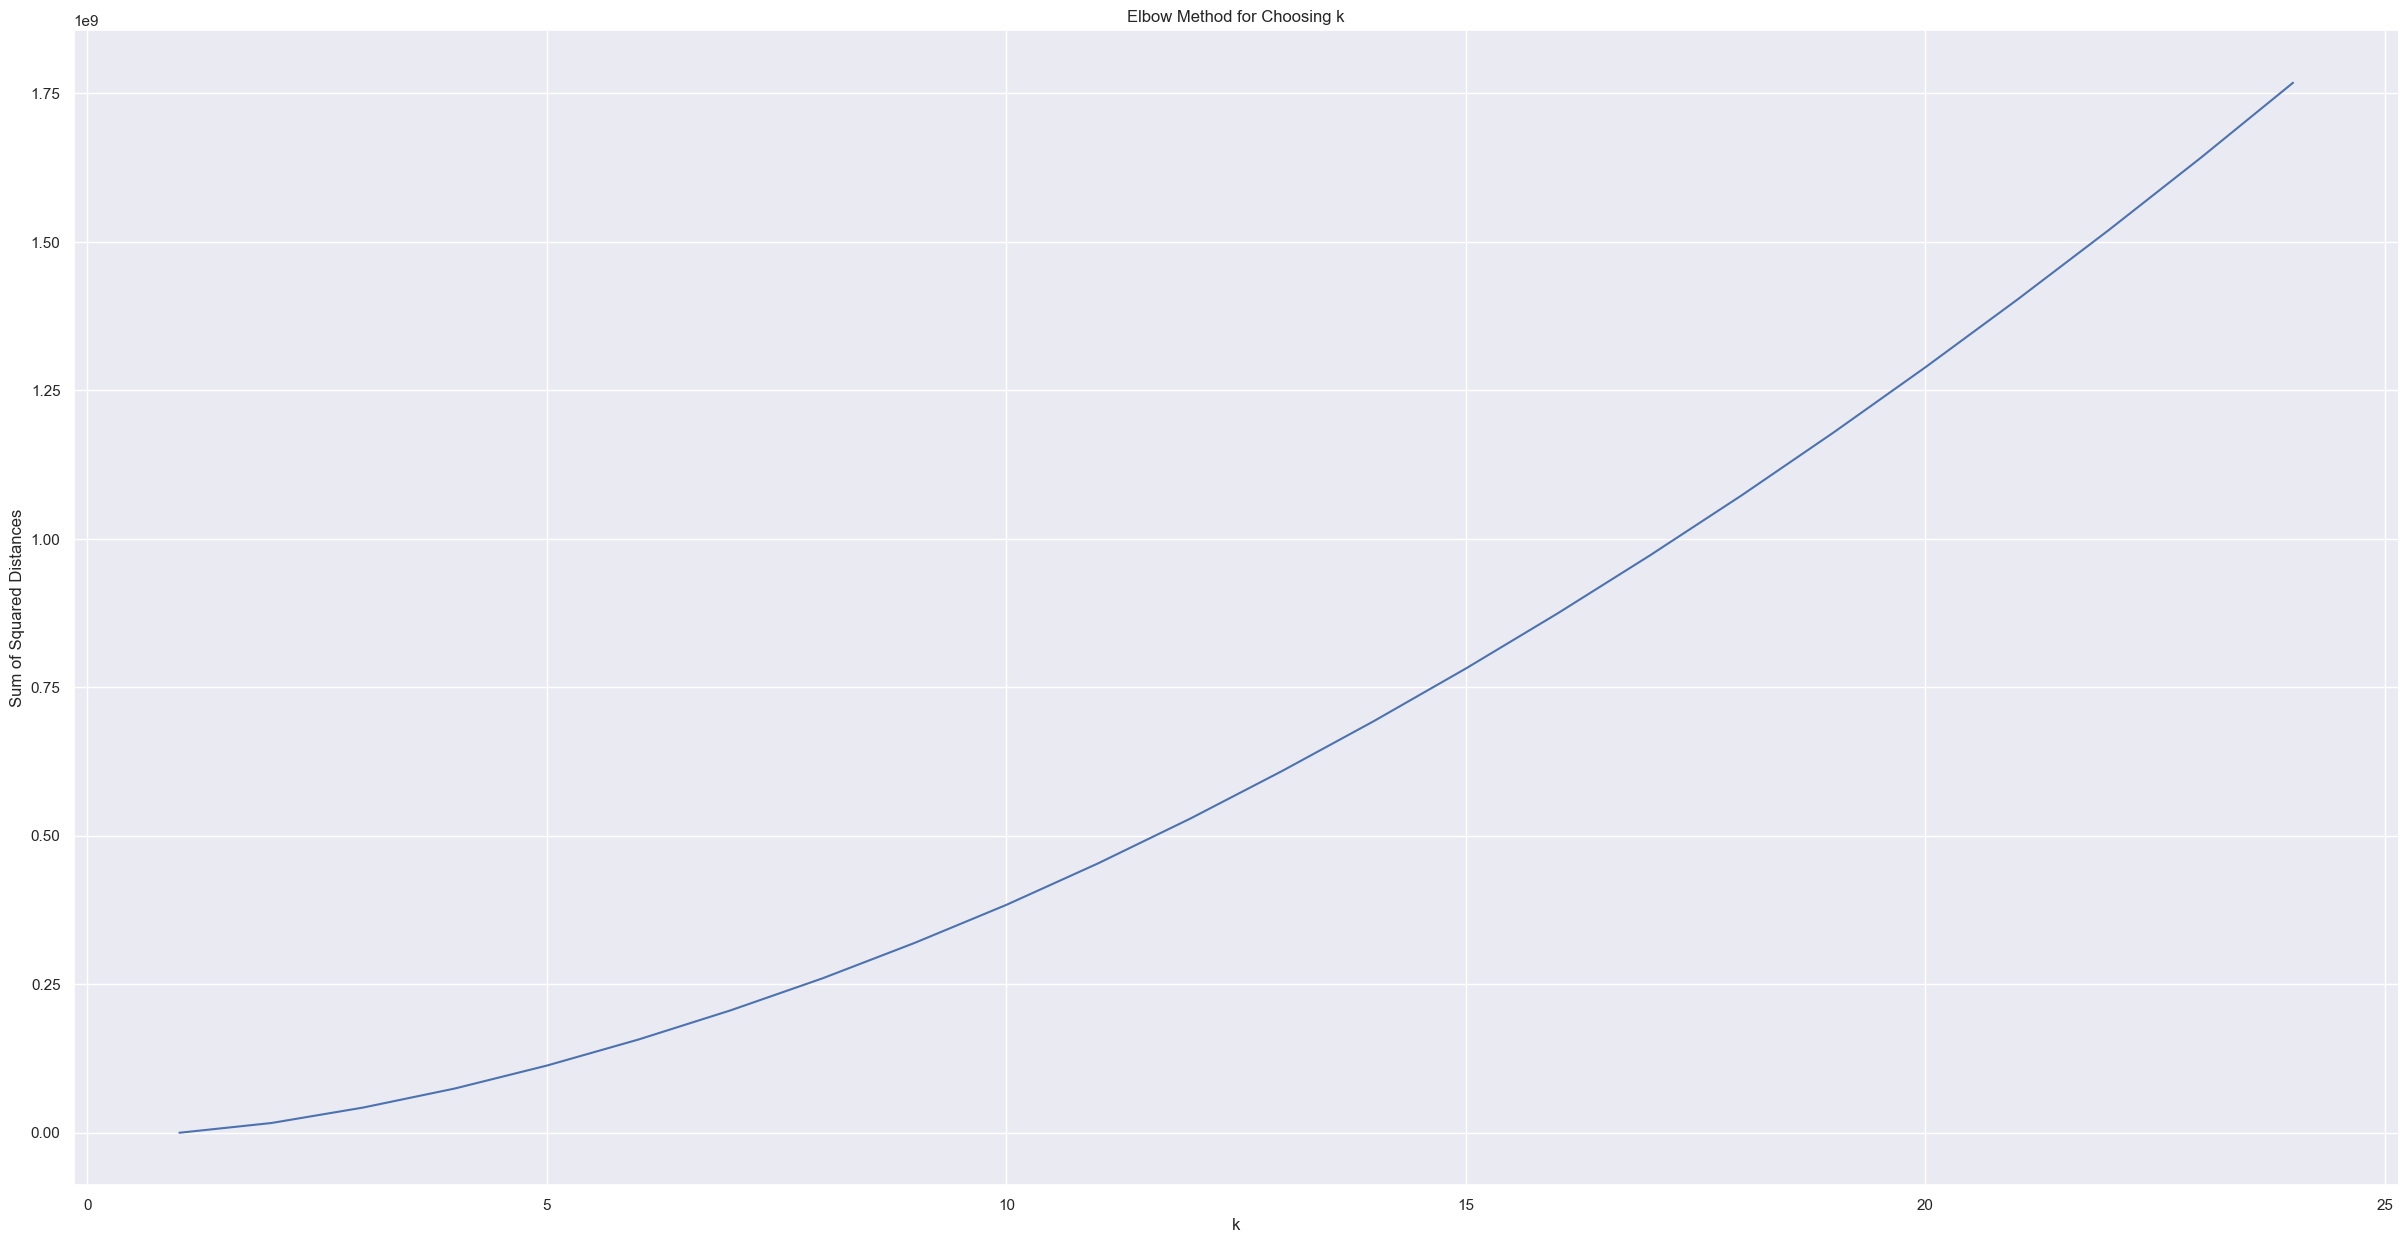

Best k: 2


In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Assuming you have your data in X (features)

# Define the range of k values to evaluate
k_values = range(1, int(np.sqrt(len(X_train))))

# Initialize SSE list
sse = []

# Calculate SSE for each k value
for k in k_values:
    neighbors = NearestNeighbors(n_neighbors=k).fit(X_train)
    distances, _ = neighbors.kneighbors(X_train)
    sse.append(np.sum(distances**2))

# Plot SSE values against k values
plt.plot(k_values, sse)
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Choosing k')
plt.show()

# Find the index of the elbow point
elbow_index = np.argmin(np.diff(sse)) + 1

# Get the corresponding k value at the elbow point
best_k = k_values[elbow_index]

print('Best k:', best_k)


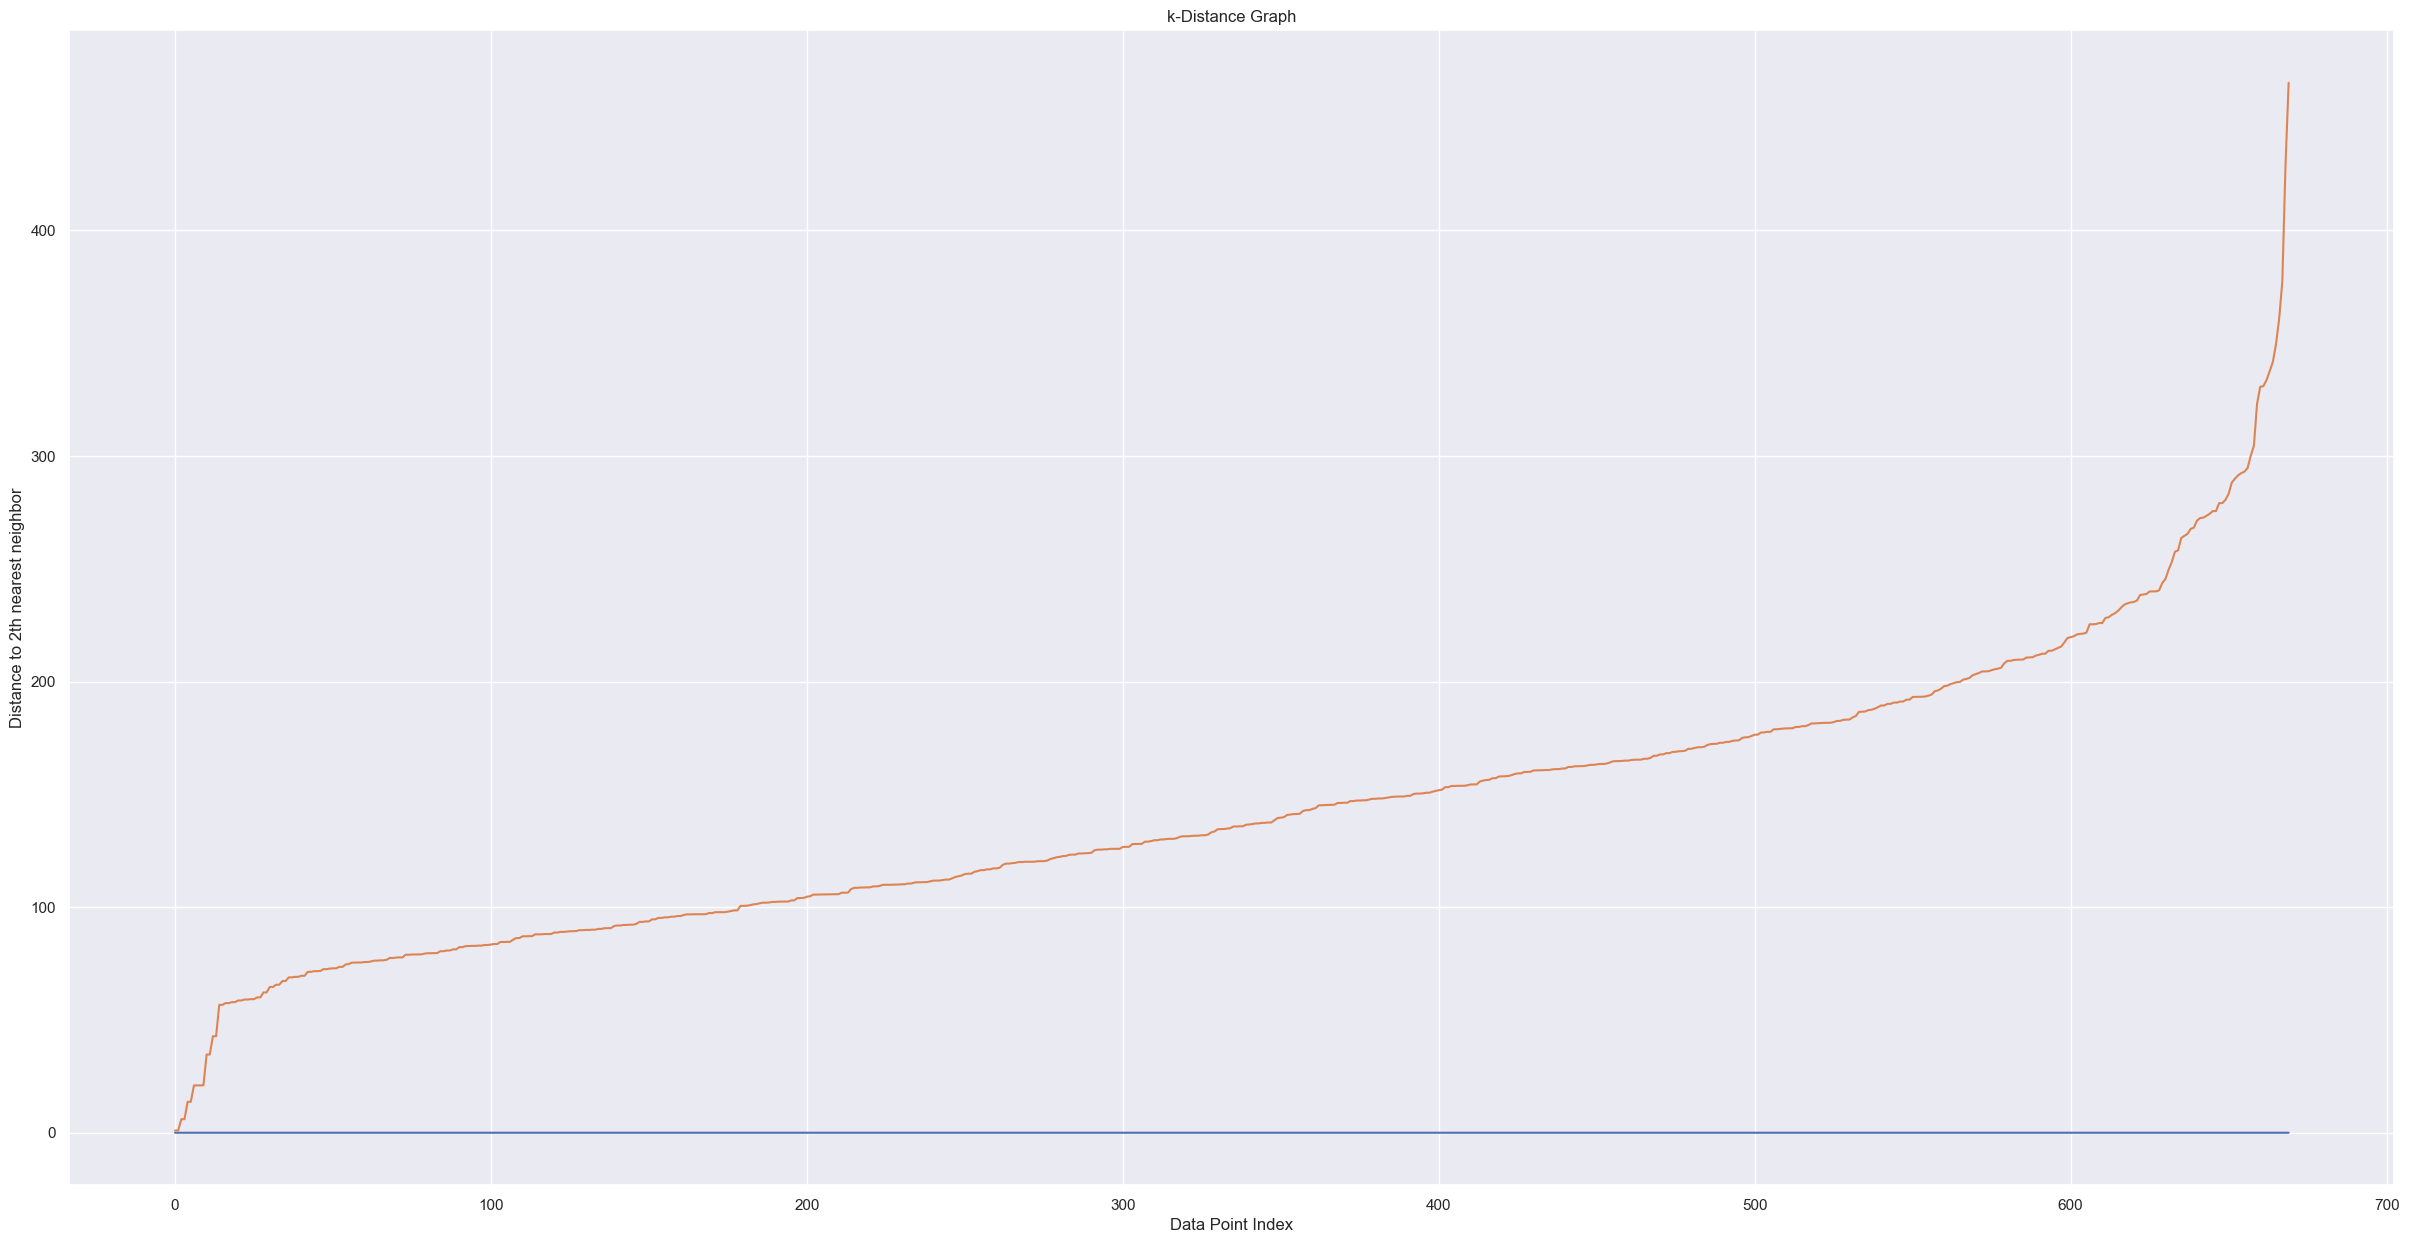

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

k = 2

# Compute pairwise distances between data points
neighbors = NearestNeighbors(n_neighbors=k).fit(X_train)
distances, _ = neighbors.kneighbors(X_train)

# Sort the distances in ascending order
# sorted_distances = np.sort(distances[:, k])

sorted_distances = distances[np.argsort(distances[:, 1])]

# Plot the sorted distances
plt.plot(range(len(X_train)), sorted_distances)
plt.xlabel('Data Point Index')
plt.ylabel('Distance to {}th nearest neighbor'.format(k))
plt.title('k-Distance Graph')
plt.show()


In [123]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans


In [124]:
from sklearn.cluster import KMeans

wcss=[]
for k in range(2,11):
    kmean=KMeans(n_clusters=k,init="k-means++")
    kmean.fit(X_train)
    wcss.append(kmean.inertia_)

c:\Users\himanshu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\himanshu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\himanshu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\himanshu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

In [125]:
wcss

[845654688.6079042,
 430527564.739637,
 281894667.7648214,
 216452086.0392232,
 180217579.14831877,
 152459315.06089687,
 132670249.7444703,
 122073150.27998416,
 112030735.02588204]

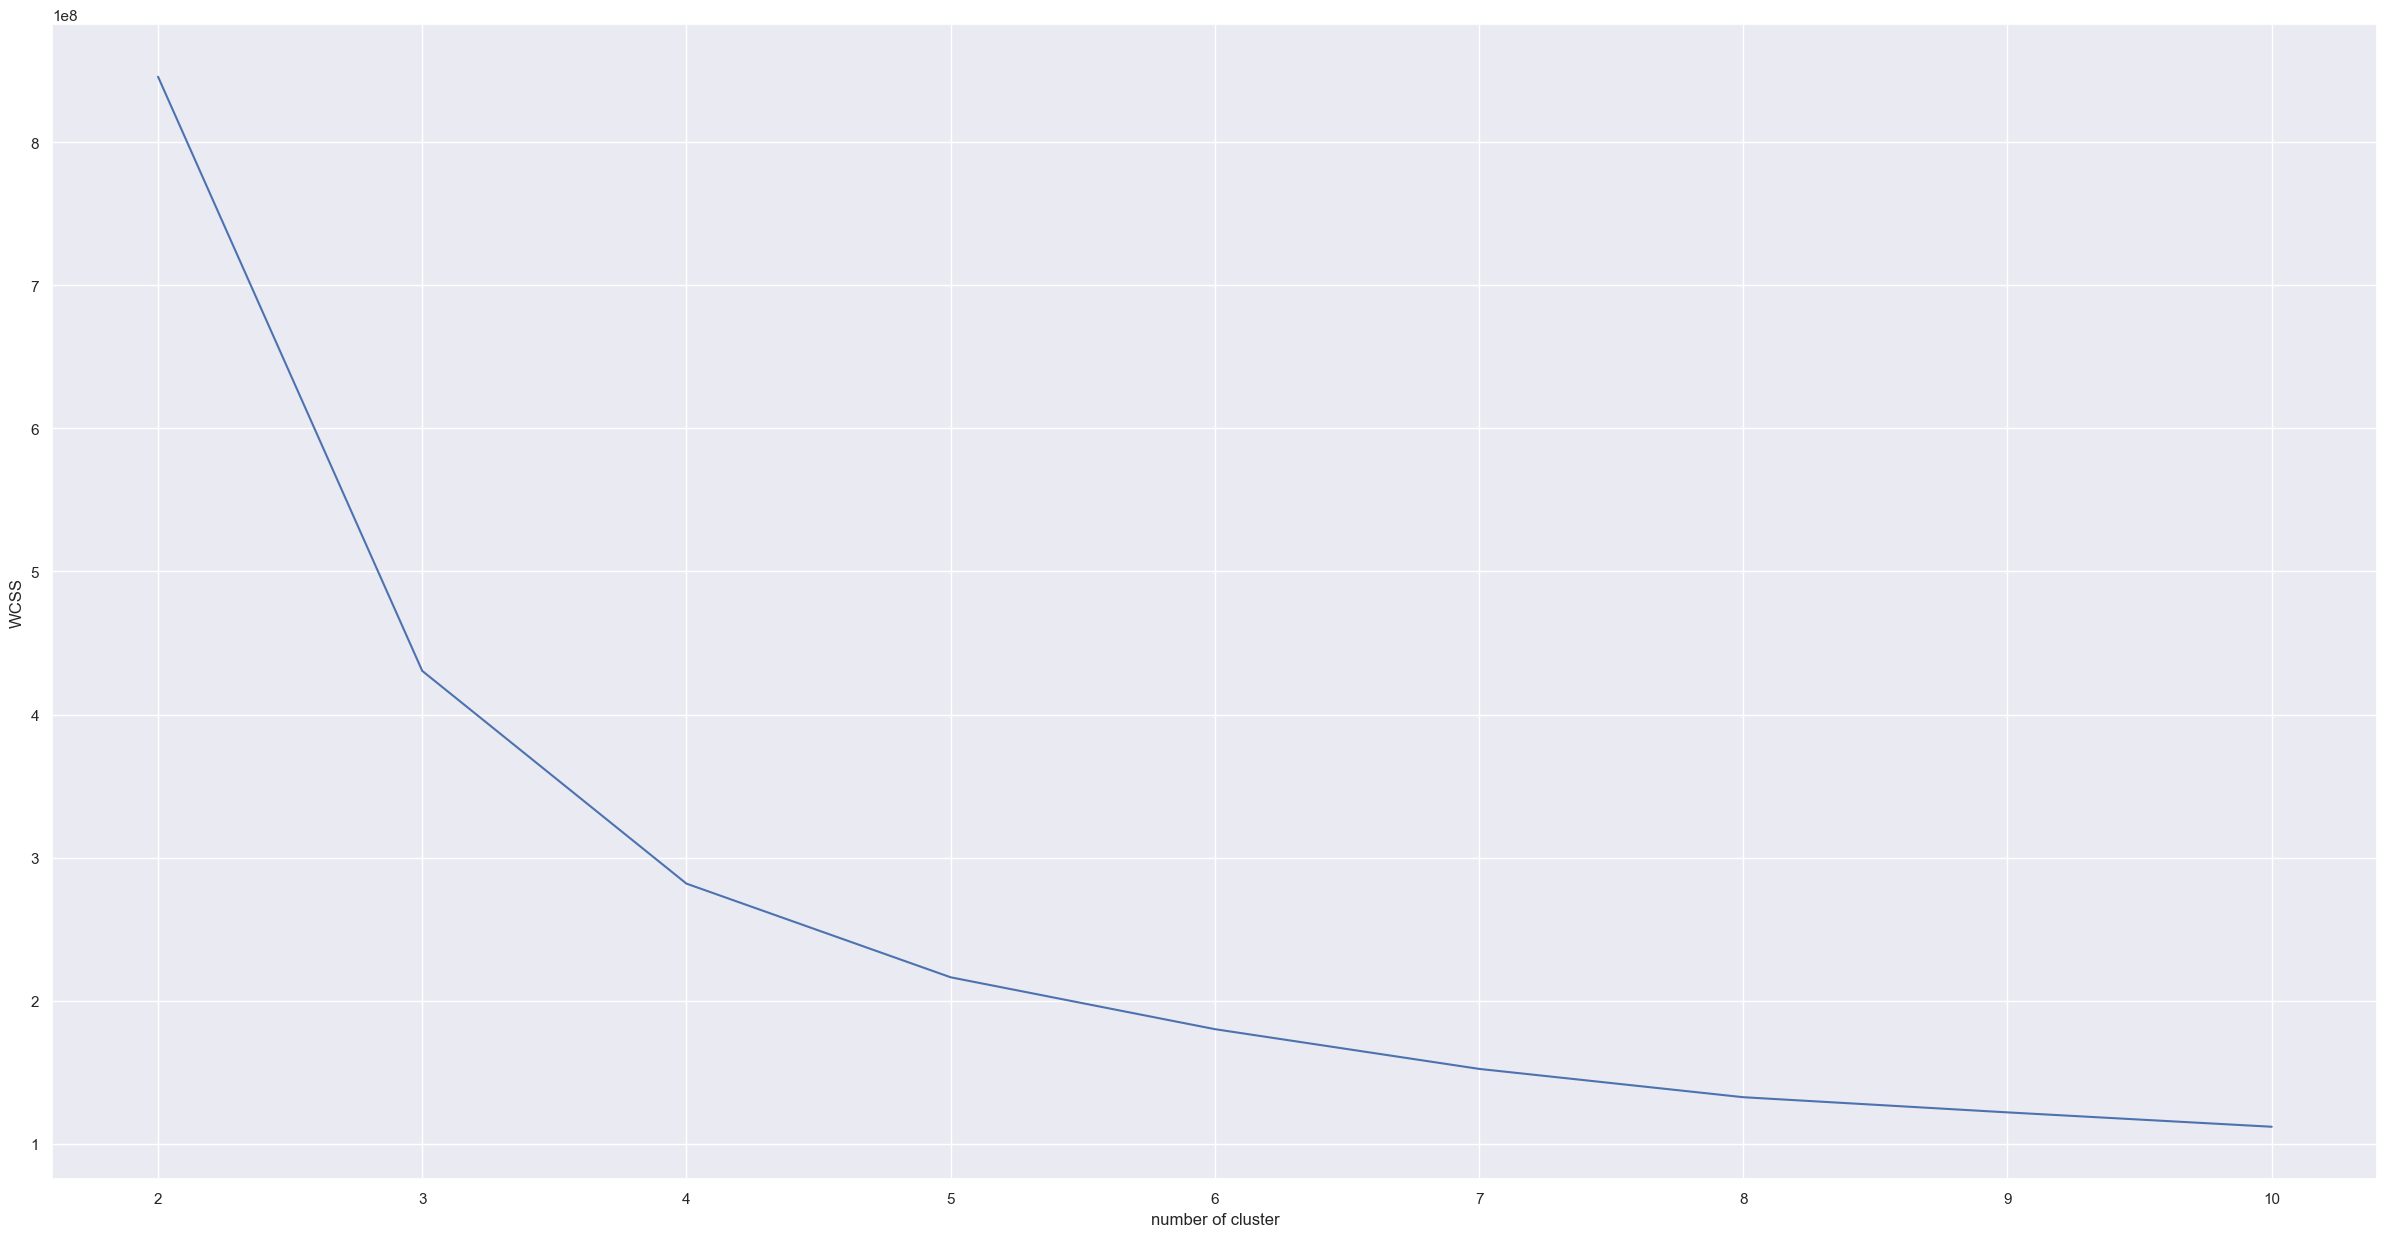

In [126]:
plt.plot(range(2,11),wcss)
plt.xticks(range(2,11))
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

In [142]:
from kneed import KneeLocator

k=KneeLocator(range(2,11),wcss,curve='convex',direction='decreasing')
k.elbow

4

In [143]:
kmeans = KMeans(n_clusters=4) 
kmeans.fit(X_train) 

test_clusters = kmeans.predict(X_test)

c:\Users\himanshu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [144]:
test_clusters

array([2, 3, 3, 3, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2, 3, 2, 2, 1, 2, 1, 1, 3,
       2, 3, 3, 2, 3, 1, 2, 2, 0, 3, 3, 0, 2, 0, 1, 0, 3, 1, 3, 3, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 3, 0, 1, 3, 0, 1, 2, 3, 2, 0, 2, 2, 2, 3, 2,
       1, 0, 3, 0, 1, 3, 1, 0, 0, 1, 1, 2, 2, 3, 2, 2, 2, 0, 3, 0, 2, 2,
       0, 1, 0, 1, 2, 3, 2, 1, 1, 3, 1, 3, 3, 0, 3, 3, 1, 1, 0, 0, 2, 1,
       2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 3, 3, 3, 3, 0, 2, 0, 1, 3, 3, 1,
       1, 1, 2, 1, 1, 2, 3, 0, 3, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 2,
       2, 1, 3, 3, 0, 3, 2, 2, 1, 3, 2, 3, 3, 2, 2, 1, 3, 1, 3, 3, 2, 2,
       2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 0, 2, 0, 1, 3, 1, 2, 2, 3, 2, 2, 3,
       2, 2, 3, 1, 1, 1, 2, 2, 3, 3, 3, 3, 2, 1, 0, 1, 3, 3, 1, 2, 3, 1,
       1, 3, 0, 2, 3, 3, 2, 3, 0, 3, 3, 3, 3, 2, 3, 1, 2, 1, 1, 3, 3, 3,
       2, 0, 2, 1, 3, 0, 1, 0, 3, 3, 1, 0, 0, 3, 1, 2, 3, 0, 2, 3, 3, 2,
       3, 2, 0, 1, 3, 3, 1, 3, 2, 3, 2, 3, 1, 2, 0, 3, 0, 3, 2, 1, 0, 1,
       2, 1, 3, 2, 3, 1, 2, 1, 2, 2, 2, 3, 3, 2, 1,